#### Problem Statement: 
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose.

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model.

Note: You can find the dataset in the link below.

Downlaod Files: https://github.com/dsrscientist/bigdatamart_rep

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

import warnings
warnings.filterwarnings('ignore')



In [27]:
train=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")

In [28]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [29]:
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


#### Checking Info of the dataset

In [30]:
type(train), type(test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [31]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [32]:
train.columns,test.columns

(Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type', 'Item_Outlet_Sales'],
       dtype='object'),
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
        'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
        'Outlet_Type'],
       dtype='object'))

In [33]:
train.info(),print("____________________________________"),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
____________________________________
<class '

(None, None, None)

In [34]:
#Knowing null values:

print(train.isnull().sum().sum()), 
print("_____________________________________________"),
test.isnull().sum().sum()

3873
_____________________________________________


2582

<AxesSubplot:>

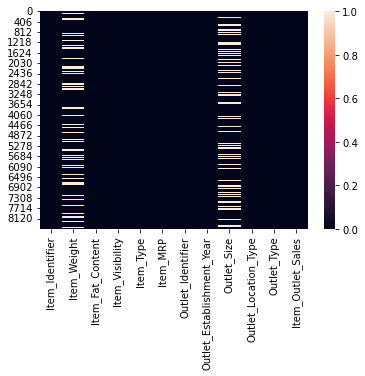

In [35]:
sns.heatmap(train.isnull()) #checking null values with heat map

<AxesSubplot:>

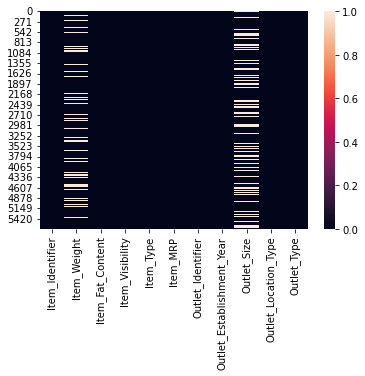

In [36]:
sns.heatmap(test.isnull())

#### Null values in:
    Train-3873:
        - Item_Weight - 1463
        - Outlet_Size - 2410
    Test -2582:
        - Item_Weight -- 976
        - Outlet_Size -- 1606



### Replacing null values in datasets:

In [37]:
from sklearn.impute import SimpleImputer
#For Both train n test data
I = SimpleImputer(strategy='most_frequent')
train['Outlet_Size']=I.fit_transform(train['Outlet_Size'].values.reshape(-1,1)) #1=row,-1=many columns
test['Outlet_Size']=I.fit_transform(test['Outlet_Size'].values.reshape(-1,1))

I = SimpleImputer(strategy='mean')
train['Item_Weight']=I.fit_transform(train['Item_Weight'].values.reshape(-1,1))
test['Item_Weight']=I.fit_transform(test['Item_Weight'].values.reshape(-1,1))

In [38]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(0, 0)

### We can also drop few unrelated columns from the dataset (test and train dataset)

In [39]:
train.drop(['Outlet_Identifier',"Item_Identifier","Outlet_Establishment_Year"], axis=1,inplace=True)
test.drop(['Outlet_Identifier',"Item_Identifier","Outlet_Establishment_Year"],axis=1, inplace=True)

In [40]:
train.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228


In [41]:
test.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.75,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1
1,8.30,reg,0.038428,Dairy,87.3198,Medium,Tier 2,Supermarket Type1


# Visualization of the training data

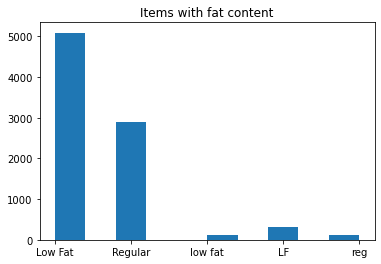

In [42]:
plt.hist(train['Item_Fat_Content'],bins=10)
plt.title('Items with fat content')
plt.show()

##### There are 3 columns for LOW FAT and 2 columns for regular. We need to combine this data in 2 sepearte columns namely - Low Fat and Regular.

In [43]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Doing the same as above for the test data:

In [44]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

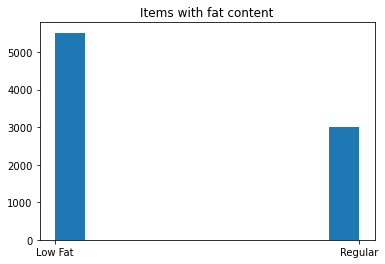

In [45]:
plt.hist(train['Item_Fat_Content'],bins=10)
plt.title('Items with fat content')
plt.show()

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

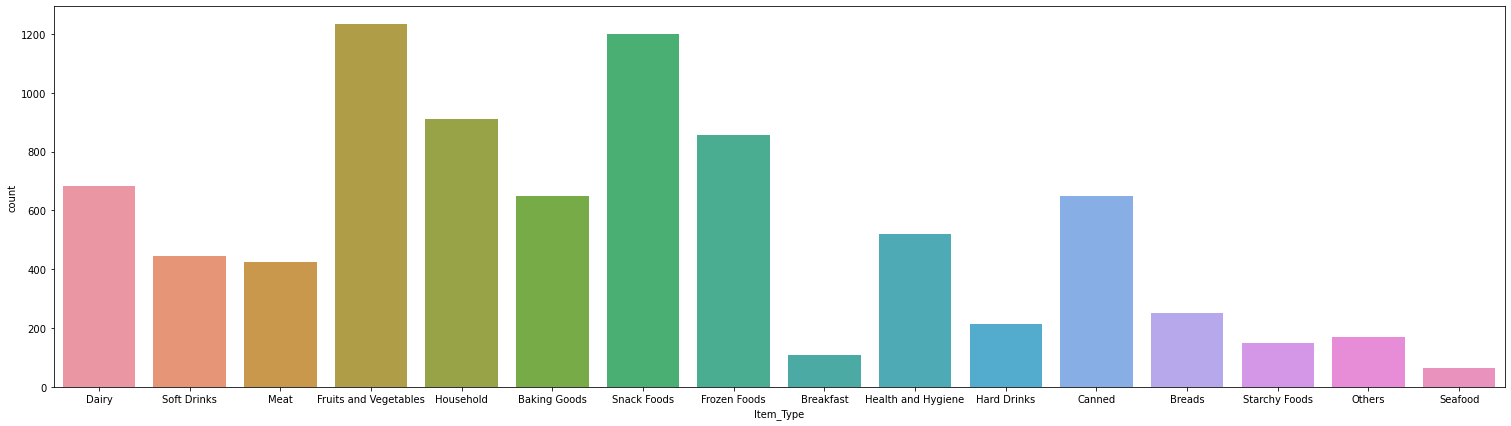

In [46]:
plt.figure(figsize = (26,7))
sns.countplot(data=train, x= "Item_Type")

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

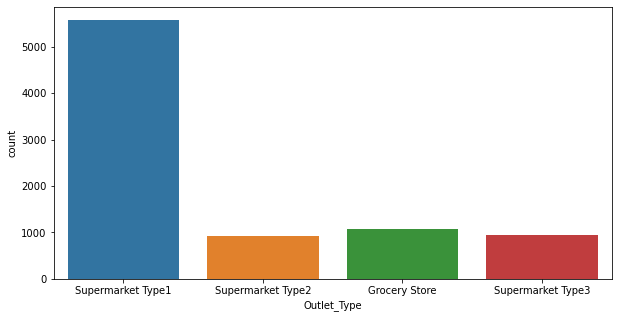

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Type',data=train)

Supermarket Type 1 are more in number followed by the grocery stores.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

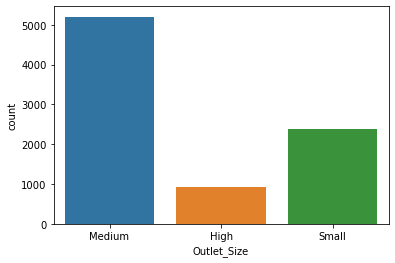

In [48]:
sns.countplot(x="Outlet_Size",data=train)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

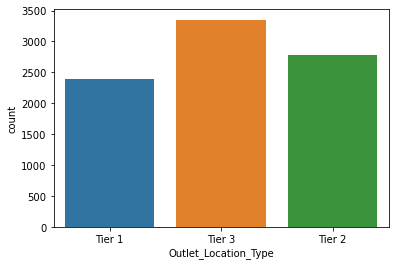

In [49]:
sns.countplot(x="Outlet_Location_Type",data=train)

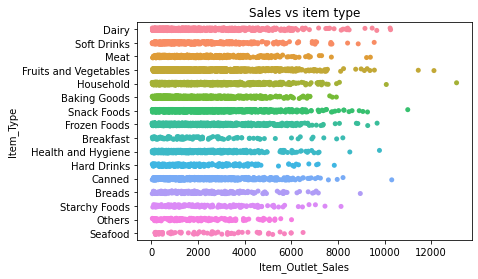

<Figure size 720x720 with 0 Axes>

In [50]:
y=train["Item_Type"]
x=train["Item_Outlet_Sales"]
a=sns.stripplot(x,y)
a.set(ylabel='Item_Type',xlabel='Item_Outlet_Sales')
plt.title('Sales vs item type')
plt.figure(figsize=(10,10))
plt.show()

It shows that the most consumed/bought products which contributed to the sales were dairy,Fruits&vegetables,Snack foods.

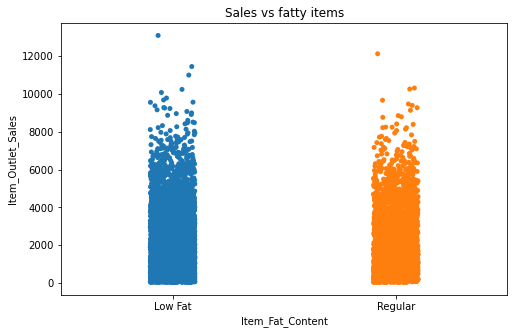

In [51]:
plt.figure(figsize=(8,5))
x=train["Item_Fat_Content"]
y=train["Item_Outlet_Sales"]
a=sns.stripplot(x,y)
a.set(xlabel='Item_Fat_Content',ylabel='Item_Outlet_Sales')
plt.title('Sales vs fatty items')
plt.show()

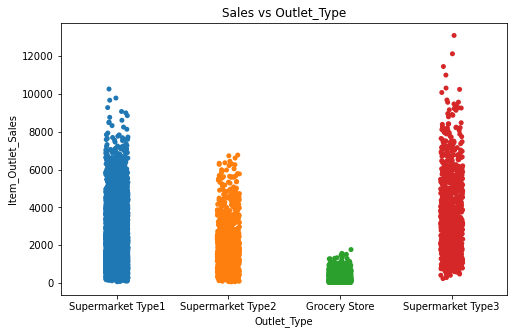

In [52]:
plt.figure(figsize=(8,5))
x=train["Outlet_Type"]
y=train["Item_Outlet_Sales"]
a=sns.stripplot(x,y)
a.set(xlabel='Outlet_Type',ylabel='Item_Outlet_Sales')
plt.title('Sales vs Outlet_Type')
plt.show()

Supermarket Type 3 showed more sales, followed by Supermarket Type 1. While least sales were observed in the grocery store

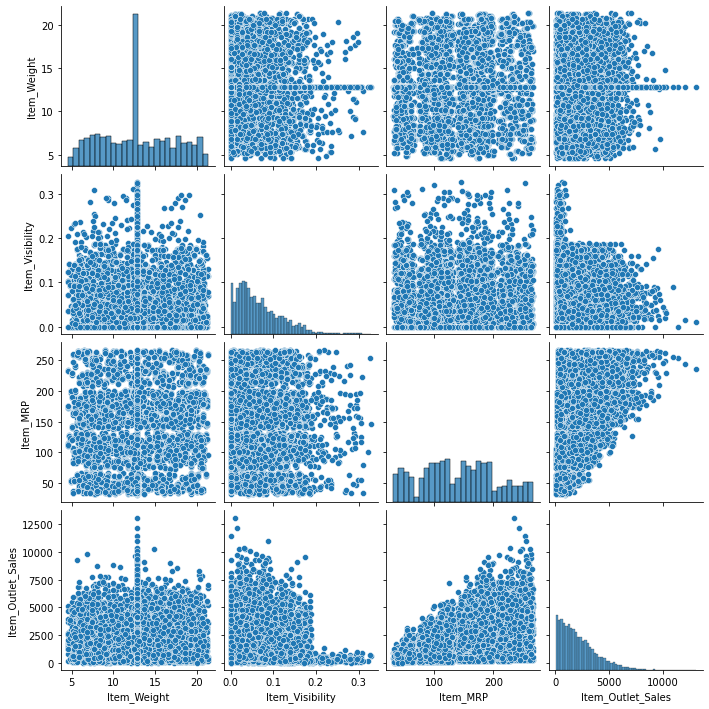

In [53]:
sns.pairplot(train)

## Encoding training Data Frame

In [54]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [55]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
l=["Item_Fat_Content","Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type" ]
for val in l:
    train[val]=le.fit_transform(train[val].astype(str))

In [56]:
#USING ENCODING FOR TEST DATA:
le=LabelEncoder()
l=["Item_Fat_Content","Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type" ]
for val in l:
    test[val]=le.fit_transform(test[val].astype(str))

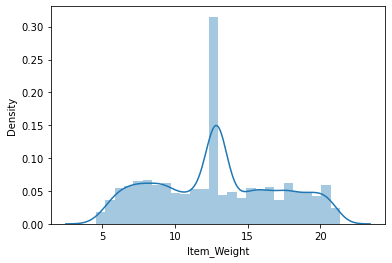

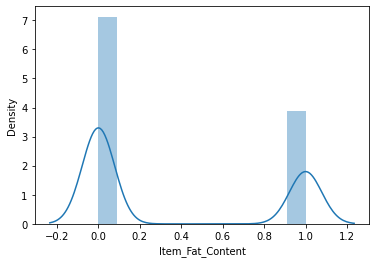

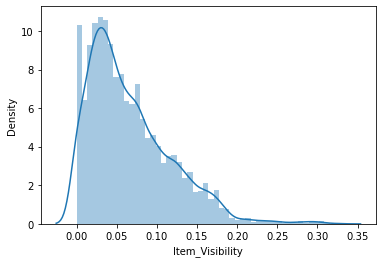

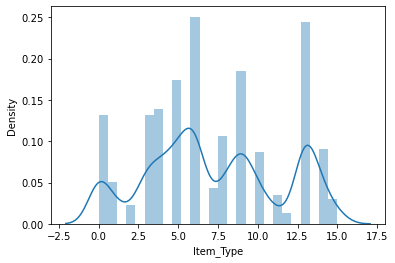

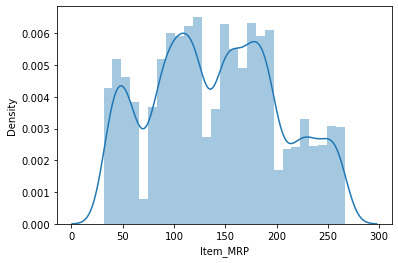

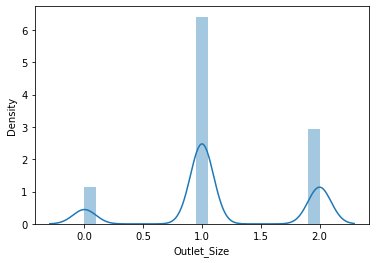

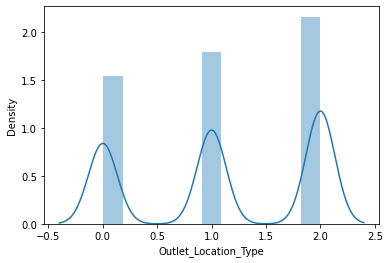

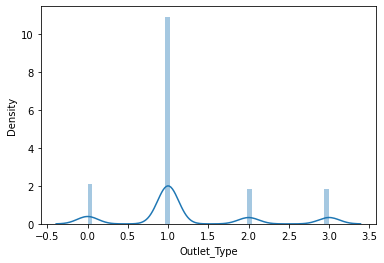

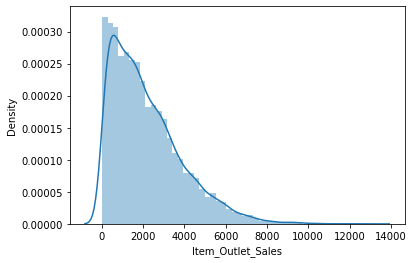

In [57]:
#for checking all columns in train dataset:

for i in train.columns:
    plt.figure()
    sns.distplot(train[i])

## EXPLATORY DATA ANALYSIS(EDA)

In [58]:
train.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,7.226681,140.992782,1.170832,1.112871,1.201220,2181.288914
std,4.226124,0.477836,0.051598,4.209990,62.275067,0.600327,0.812757,0.796459,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,1.000000,0.000000,1.000000,834.247400
50%,12.857645,0.000000,0.053931,6.000000,143.012800,1.000000,1.000000,1.000000,1794.331000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,2.000000,2.000000,1.000000,3101.296400
max,21.350000,1.000000,0.328391,15.000000,266.888400,2.000000,2.000000,3.000000,13086.964800


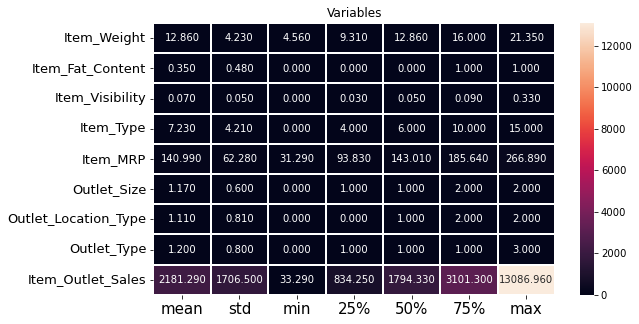

In [59]:
#plotting heat map for better understanding:
plt.figure(figsize=(9,5))
sns.heatmap(round(train.describe()[1:].transpose(),2),linewidth=2, annot=True,fmt='0.3f')
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.title("Variables")
plt.show()

### Describing the dataset:

- The difference between 75% and max is huge in Item outlet Sales column, while it is more in Item MRP, Item type and Item weight.This indicates that there might be outliers in these columns.
- The mean > Median in Item outlet sales, and Item type columns, which means data is right skewed or left tailed.
- The mean< median in Item MRP column, indication it is a right tailed graph.
- Std deviation is high in Item outlet Sales, Item MRP and Item weight columns, meaning data in these columns is highly spread.
- High gap is present between 75% and max of Item outlet sales, Item MRP,Item weight, while considerable gap is present in item type, which means outliers might be present in these columns.

## Check the correlation of training dataset with the target column:

In [60]:
train.corr() #correlation 

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.021157,1.000000,0.047314,-0.139434,0.006063,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.012049,0.047314,1.000000,-0.035249,-0.001315,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,0.028015,-0.139434,-0.035249,1.000000,0.032651,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.024756,0.006063,-0.001315,0.032651,1.000000,0.006059,0.000232,-0.001975,0.567574
Outlet_Size,-0.007225,-0.000622,0.069309,-0.001859,0.006059,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,0.002199,-0.173468,0.003053,-0.001975,-0.201483,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.011550,0.018719,-0.128625,0.017048,0.567574,-0.086182,0.089367,0.401522,1.000000


<AxesSubplot:>

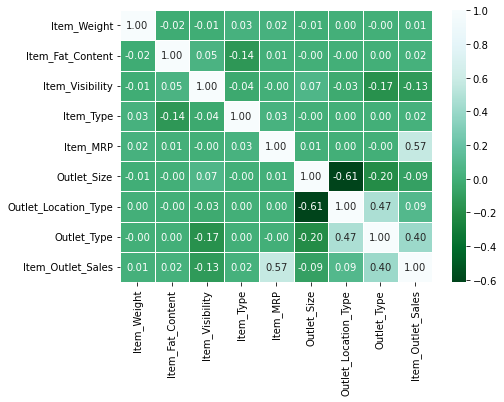

In [61]:
plt.figure(figsize=(7,5))
sns.heatmap(train.corr(),cmap='BuGn_r',annot=True,linewidth=0.5,fmt='0.2f')

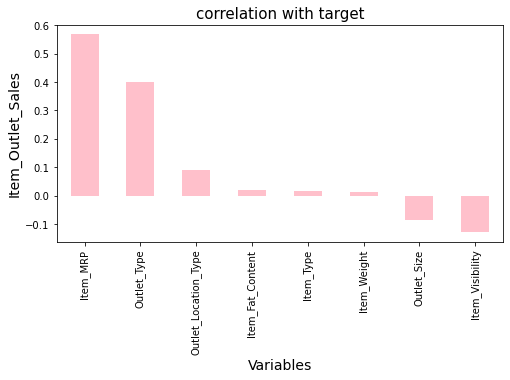

In [62]:
#checking the columns which are positively and negatively corelated with the target column:

plt.figure(figsize=(8,4))
train.corr()["Item_Outlet_Sales"].sort_values(ascending=False).drop(["Item_Outlet_Sales"]).plot(kind='bar', color='pink')
plt.xlabel('Variables',fontsize=14)
plt.ylabel("Item_Outlet_Sales",fontsize=14)
plt.title("correlation with target",fontsize=15)
plt.show()


In [63]:
train.corr()["Item_Outlet_Sales"].sort_values()

Item_Visibility        -0.128625
Outlet_Size            -0.086182
Item_Weight             0.011550
Item_Type               0.017048
Item_Fat_Content        0.018719
Outlet_Location_Type    0.089367
Outlet_Type             0.401522
Item_MRP                0.567574
Item_Outlet_Sales       1.000000
Name: Item_Outlet_Sales, dtype: float64

#### From the heat map it can be seen that the traget column 'Item_Outlet_Sales' is having maximum positive correlation with following factors:
- Item_Weight             0.011550
- Item_Type               0.017048
- Item_Fat_Content        0.018719
- Outlet_Location_Type    0.089367
- Outlet_Type             0.401522
- Item_MRP                0.567574

And negative correlation with--
- Item_Visibility    ==     -0.128625
- Outlet_Size        ==     -0.086182

## Using VIF to remove highly correlated column:

#### In Training Dataset:

In [64]:
x=train.iloc[:,0:9]
y=train.iloc[:,-1]

In [65]:
x.shape,y.shape, x.shape[1]

((8523, 9), (8523,), 9)

In [66]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [67]:
vif_calc()

   VIF Factor              features
0    7.639772           Item_Weight
1    1.537459      Item_Fat_Content
2    2.652558       Item_Visibility
3    3.693134             Item_Type
4    9.257248              Item_MRP
5    5.581632           Outlet_Size
6    5.035847  Outlet_Location_Type
7    5.748664           Outlet_Type
8    5.345996     Item_Outlet_Sales


In dataset, the multicollinearity can be seen in "Item_Weight" and "Item_MRP", where the VIF is above 5.
- Since Item_MRP shows highest corelation with the target column compared to Item_Weight, we can drop the later column from both test and train datasets.

In [68]:
#dropping the columns in both test and train datasets:
train.drop(['Item_Weight'],axis=1,inplace=True)
test.drop(['Item_Weight'],axis=1, inplace=True)

In [69]:
train.head(1)

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,0.016047,4,249.8092,1,0,1,3735.138


In [70]:
test.head(1)

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,0.007565,13,107.8622,1,0,1


# Checking Outliers in Training and Testing data:

Item_Fat_Content           AxesSubplot(0.125,0.657941;0.133621x0.222059)
Item_Visibility         AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Item_Type                AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Item_MRP                AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Outlet_Size             AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Outlet_Location_Type       AxesSubplot(0.125,0.391471;0.133621x0.222059)
Outlet_Type             AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Item_Outlet_Sales        AxesSubplot(0.44569,0.391471;0.133621x0.222059)
dtype: object

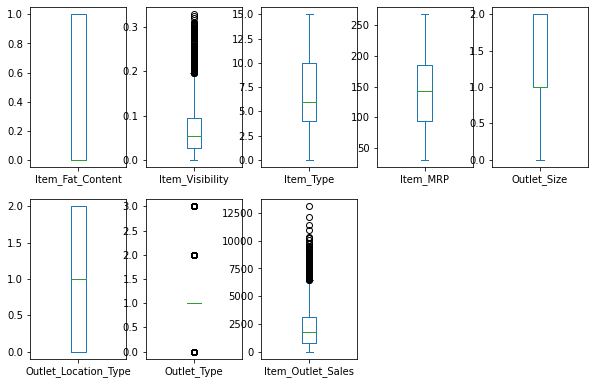

In [71]:
train.plot(kind='box',subplots=True,layout=(3,5),figsize=(10,10))

No outliers can  be seen n training dataset, except that they may be present in the "Item_visibility","Outlet_Type" column and target columm.

Item_Fat_Content           AxesSubplot(0.125,0.657941;0.133621x0.222059)
Item_Visibility         AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Item_Type                AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Item_MRP                AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Outlet_Size             AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Outlet_Location_Type       AxesSubplot(0.125,0.391471;0.133621x0.222059)
Outlet_Type             AxesSubplot(0.285345,0.391471;0.133621x0.222059)
dtype: object

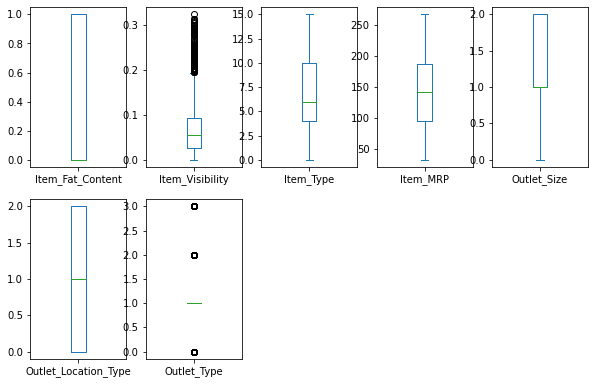

In [72]:
test.plot(kind='box',subplots=True,layout=(3,5),figsize=(10,10))

Outliers may be present in the "Item_visibility", "Outlet_type" column.

### REMOVING OUTLIERS from training dataset

In [73]:
from scipy.stats import zscore
z=np.abs(zscore(train))
z.shape

(8523, 8)

In [74]:
#threshold for zscore values-----> above 3 are considered as outliers.

threshold=3
print(np.where(z>3))

#arrays are the index loc where outliers are present

len(np.where(z>3)[0])

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
        991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
       1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
       1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
       2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
       3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
       3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
       4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
       4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
       5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
       5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
       6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
       6886, 6903, 6993, 7005, 7016, 7076, 7088, 7

185

In [75]:
z.iloc[49]  #At 49th index location outlier is present

Item_Fat_Content        1.354743
Item_Visibility         3.668255
Item_Type               0.766479
Item_MRP                0.897468
Outlet_Size             1.381274
Outlet_Location_Type    1.369334
Outlet_Type             1.508289
Item_Outlet_Sales       0.821010
Name: 49, dtype: float64

In [76]:
#Removing the outliers

Train=train[(z<3).all(axis=1)]
Train

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,0.016047,4,249.8092,1,0,1,3735.1380
1,1,0.019278,14,48.2692,1,2,2,443.4228
2,0,0.016760,10,141.6180,1,0,1,2097.2700
3,1,0.000000,6,182.0950,1,2,0,732.3800
4,0,0.000000,9,53.8614,0,2,1,994.7052
...,...,...,...,...,...,...,...,...
8518,0,0.056783,13,214.5218,0,2,1,2778.3834
8519,1,0.046982,0,108.1570,1,1,1,549.2850
8520,0,0.035186,8,85.1224,2,1,1,1193.1136
8521,1,0.145221,13,103.1332,1,2,2,1845.5976


In [77]:
print('Old_DF:',train.shape)
print('New_DF:',Train.shape)
print('total dropped rows:',train.shape[0]-Train.shape[0])

Old_DF: (8523, 8)
New_DF: (8338, 8)
total dropped rows: 185


### Percentage data loss
Checking how many outliers are still there and if they help in the testing model or not.

In [78]:
loss_percent=(8523-8338)/8523*100
print(loss_percent,'%')

2.170597207556025 %


#### Removing Outliers from Test dataset

In [79]:
#use Zscore technique.
from scipy.stats import zscore
z1=np.abs(zscore(test))
z1.shape

(5681, 7)

In [80]:
threshold=3
print(np.where(z>3))

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
        991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
       1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
       1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
       2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
       3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
       3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
       4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
       4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
       5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
       5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
       6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
       6886, 6903, 6993, 7005, 7016, 7076, 7088, 7

In [81]:
z1.iloc[130]

Item_Fat_Content        1.349873
Item_Visibility         0.947404
Item_Type               1.714612
Item_MRP                0.595656
Outlet_Size             0.284737
Outlet_Location_Type    1.091560
Outlet_Type             1.002457
Name: 130, dtype: float64

In [82]:
#Removing the outliers

Test=test[(z<3).all(axis=1)]
Test

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,0.007565,13,107.8622,1,0,1
1,1,0.038428,4,87.3198,1,1,1
2,0,0.099575,11,241.7538,1,2,0
3,0,0.015388,13,155.0340,1,1,1
4,1,0.118599,4,234.2300,1,2,3
...,...,...,...,...,...,...,...
5676,1,0.013496,13,141.3154,2,0,1
5677,1,0.142991,15,169.1448,1,2,2
5678,0,0.073529,8,118.7440,1,1,1
5679,1,0.000000,3,214.6218,1,1,1


In [83]:
print('Old_DF:',test.shape)
print('New_DF:',Test.shape)
print('total dropped rows:',test.shape[0]-Test.shape[0])

Old_DF: (5681, 7)
New_DF: (5564, 7)
total dropped rows: 117


In [84]:
loss_percent=(5681-5564)/5681*100
print(loss_percent,'%')

2.059496567505721 %


#### Both Train and test datasets have around 2% of data loss, which is considerably okay after removing the outliers.

# Check Skewness

- In training dataset=Train
- In testing dataset=Test

In [85]:
Train.skew()

Item_Fat_Content        0.620973
Item_Visibility         0.794272
Item_Type               0.098295
Item_MRP                0.138990
Outlet_Size            -0.087933
Outlet_Location_Type   -0.202674
Outlet_Type             0.956727
Item_Outlet_Sales       0.878267
dtype: float64

Keeping +/- 0.5 as the threshold, Skewness is seen in
- Item_Fat_Content        0.620973
- Item_Visibility         0.794272
- Outlet_Type             0.956727
- Item_Outlet_Sales       0.878267

In [86]:
Test.skew()

Item_Fat_Content        0.612138
Item_Visibility         1.233548
Item_Type               0.093591
Item_MRP                0.134434
Outlet_Size            -0.086134
Outlet_Location_Type   -0.207715
Outlet_Type             0.930698
dtype: float64

Here skewness is seen in
- Item_Fat_Content        0.612138
- Item_Visibility         1.233548
- Outlet_Type             0.930698

## Removing the skewness
Seperating the coulumns in target and features

In [87]:
x=Train.drop('Item_Outlet_Sales',axis=1)
y=Train['Item_Outlet_Sales']

In [88]:
x.shape,y.shape

((8338, 7), (8338,))

In [89]:
Train['Item_Visibility']=np.sqrt(Train['Item_Visibility'])
Train['Outlet_Type']=np.sqrt(Train['Outlet_Type'])
Train['Item_Outlet_Sales']=np.sqrt(Train['Item_Outlet_Sales'])

In [90]:
Train.skew()

Item_Fat_Content        0.620973
Item_Visibility        -0.245035
Item_Type               0.098295
Item_MRP                0.138990
Outlet_Size            -0.087933
Outlet_Location_Type   -0.202674
Outlet_Type            -0.843914
Item_Outlet_Sales       0.112275
dtype: float64

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

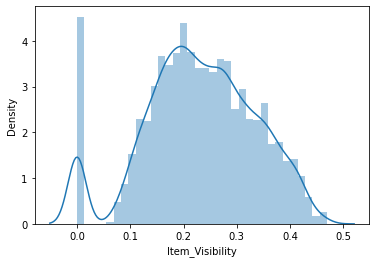

In [91]:
sns.distplot(Train["Item_Visibility"])

#### For Testing dataset:
- Item_Fat_Content 0.612138
- Item_Visibility 1.233548
- Outlet_Type 0.930698

In [92]:
Test['Item_Visibility']=np.sqrt(Test['Item_Visibility'])
Test['Item_Fat_Content']=np.sqrt(Test['Item_Fat_Content'])
Test['Outlet_Type']=np.sqrt(Test['Outlet_Type'])

In [93]:
Test.skew()

Item_Fat_Content        0.612138
Item_Visibility        -0.101482
Item_Type               0.093591
Item_MRP                0.134434
Outlet_Size            -0.086134
Outlet_Location_Type   -0.207715
Outlet_Type            -0.816600
dtype: float64

## Scaling The Data using Standard Scaler
### Since the data is continous we will use the linear regression model

In [94]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x)
x=x1
x

array([[-0.73664489, -1.0115072 , -0.76658944, ..., -0.27887393,
        -1.37034498, -0.25983859],
       [ 1.35750619, -0.94331963,  1.61017133, ..., -0.27887393,
         1.09905991,  1.02213428],
       [-0.73664489, -0.9964643 ,  0.65946702, ..., -0.27887393,
        -1.37034498, -0.25983859],
       ...,
       [-0.73664489, -0.60758452,  0.18411487, ...,  1.38320672,
        -0.13564253, -0.25983859],
       [ 1.35750619,  1.71466062,  1.37249526, ..., -0.27887393,
         1.09905991,  1.02213428],
       [-0.73664489, -0.40303734,  1.61017133, ...,  1.38320672,
        -1.37034498, -0.25983859]])

In [95]:
y

0       61.115775
1       21.057607
2       45.795961
3       27.062520
4       31.538947
          ...    
8518    52.710373
8519    23.436830
8520    34.541477
8521    42.960419
8522    27.670743
Name: Item_Outlet_Sales, Length: 8338, dtype: float64

### For standarizing the test data:

In [96]:
test=sc.fit_transform(Test)
test

array([[-0.7397802 , -1.36738512,  1.36412473, ..., -0.28296666,
        -1.36863003,  0.00343749],
       [ 1.35175285, -0.34685163, -0.77136076, ..., -0.28296666,
        -0.13801311,  0.00343749],
       [-0.7397802 ,  0.77167421,  0.8895724 , ..., -0.28296666,
         1.0926038 , -2.21236312],
       ...,
       [-0.7397802 ,  0.35623704,  0.1777439 , ..., -0.28296666,
        -0.13801311,  0.00343749],
       [ 1.35175285, -2.18131415, -1.00863693, ..., -0.28296666,
        -0.13801311,  0.00343749],
       [ 1.35175285,  0.84700685, -1.00863693, ..., -0.28296666,
        -0.13801311,  0.00343749]])

### Splitting the data for ML:

In [97]:
x=x_train
y=y_train
test=x_test

NameError: name 'x_train' is not defined

### Checking the Best Fit Model

In [98]:
ln=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    ln.fit(x_train,y_train)
    pred_test=ln.predict(x_test)
    pred_train=ln.predict(x_train)
    print(f"At random state {i},the training accuracy is: {r2_score(y_train,pred_train)*100}")
    print(f"At random state {i} the testing accuracy is: {r2_score(y_test,pred_test)*100}")
    print("\n")

At random state 0,the training accuracy is: 54.501519692123445
At random state 0 the testing accuracy is: 52.166383079631416


At random state 1,the training accuracy is: 53.77711530481712
At random state 1 the testing accuracy is: 55.06939144616412


At random state 2,the training accuracy is: 53.95359392713321
At random state 2 the testing accuracy is: 54.28255581234234


At random state 3,the training accuracy is: 54.71921761345033
At random state 3 the testing accuracy is: 51.28817709759055


At random state 4,the training accuracy is: 53.57354442971665
At random state 4 the testing accuracy is: 55.73511913576419


At random state 5,the training accuracy is: 54.07810591220138
At random state 5 the testing accuracy is: 53.67074678228618


At random state 6,the training accuracy is: 54.21498216675462
At random state 6 the testing accuracy is: 53.35693340320633


At random state 7,the training accuracy is: 54.0074943121733
At random state 7 the testing accuracy is: 54.169808865145086


### At random state 7 ,the training accuracy and testing R2 Score is: 54%

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=7)
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((6670, 7), (1668, 7), (6670,), (1668,))

In [100]:
#Linear Regression:
ln.fit(x_train,y_train)
pred_test=ln.predict(x_test)
pred_train=ln.predict(x_train)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 9.566413878943568
Mean squared error: 146.01211727864242
Root mean squared error: 12.083547379749145
R2 Score= 54.169808865145086


In [101]:
#Lasso Regression:
l=Lasso()
l.fit(x_train,y_train)
pred_test=l.predict(x_test)
pred_train=l.predict(x_train)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('lasso R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 10.125540618090822
Mean squared error: 157.02382406371325
Root mean squared error: 12.530914733718095
lasso R2 Score= 50.71346129559584


In [102]:
#Ridge Regression:
r=Ridge() 
r.fit(x_train,y_train)
pred_test=r.predict(x_test)
pred_train=r.predict(x_train)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('ridge R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 9.566568885057698
Mean squared error: 146.01138715844348
Root mean squared error: 12.083517168376245
ridge R2 Score= 54.17003803481191


In [103]:
#ElasticNet Regression:
en=ElasticNet() 
en.fit(x_train,y_train)
pred_test=en.predict(x_test)
pred_train=en.predict(x_train)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('en R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 11.027380005186721
Mean squared error: 178.06593302024365
Root mean squared error: 13.344134779754125
en R2 Score= 44.10877742872275


In [104]:
#Stochastic Gradient Descent Regression:
sgd=SGDRegressor() 
sgd.fit(x_train,y_train)
pred_test=sgd.predict(x_test)
pred_train=sgd.predict(x_train)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('dt R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 9.579465802353196
Mean squared error: 146.3327267370847
Root mean squared error: 12.09680646853064
dt R2 Score= 54.06917617085978


In [105]:
#RandomForestRegression:
rf=RandomForestRegressor() 
rf.fit(x_train,y_train)
pred_test=rf.predict(x_test)
pred_train=rf.predict(x_train)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('rf R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 8.536043244558046
Mean squared error: 123.70766277014299
Root mean squared error: 11.122394650889843
rf R2 Score= 61.17071695644039


In [106]:
#Support vector Regression:
svr=SVR()
svr.fit(x_train,y_train)
pred_test=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('svr R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 8.387273000642264
Mean squared error: 115.59905409718623
Root mean squared error: 10.751700056139319
svr R2 Score= 63.71584192446047


In [107]:
#KNeighborsRegression:
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
pred_test=kn.predict(x_test)
pred_train=kn.predict(x_train)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('kn R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 8.913658235700481
Mean squared error: 131.9875791838195
Root mean squared error: 11.488584733718053
kn R2 Score= 58.57182202297911


In [108]:
#GradientBoostingregression:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_test=gb.predict(x_test)
pred_train=gb.predict(x_train)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('gb R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 8.09361175430356
Mean squared error: 111.04853248741509
Root mean squared error: 10.537956751069682
gb R2 Score= 65.14415677274879


In [109]:
#AdaBoostRegression:
ab=AdaBoostRegressor()
ab.fit(x_train,y_train)
pred_test=ab.predict(x_test)
pred_train=ab.predict(x_train)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('ab R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 8.44431089178719
Mean squared error: 118.42675650906472
Root mean squared error: 10.882405823578935
ab R2 Score= 62.828284477693444


In [110]:
#ExtraTreesRegression:
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
pred_test=et.predict(x_test)
pred_train=et.predict(x_train)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred_test))
print('Mean squared error:',mean_squared_error(y_test,pred_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_test)))
print('et R2 Score=',r2_score(y_test,pred_test)*100)

Error:
Mean absolute error: 8.882413573978633
Mean squared error: 134.88827787653744
Root mean squared error: 11.614141288814142
et R2 Score= 57.661352549694286


### R2 Score= 65.14% with Gradient Boosting Regressor.

# Cross Validation Method

In [111]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(ln,x,y,cv=5)
print("Cross validadtion score of Linear regression Model is", scr.mean())

scr=cross_val_score(l,x,y,cv=5)
print("Cross validadtion score of Lasso Regression is", scr.mean())

scr=cross_val_score(r,x,y,cv=5)
print("Cross validadtion score of Ridge Regression is", scr.mean())

scr=cross_val_score(en,x,y,cv=5)
print("Cross validadtion score of Elastic Net is", scr.mean())

scr=cross_val_score(sgd,x,y,cv=5)
print("Cross validadtion score of SGDRegression is", scr.mean())

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validadtion score of Random Forest is", scr.mean())

scr=cross_val_score(svr,x,y,cv=5)
print("Cross validadtion score of SVR is", scr.mean())

scr=cross_val_score(kn,x,y,cv=5)
print("Cross validadtion score of KNeighbors is", scr.mean())

scr=cross_val_score(gb,x,y,cv=5)
print("Cross validadtion score of Gradient Boosting is", scr.mean())

scr=cross_val_score(ab,x,y,cv=5)
print("Cross validadtion score of AdaBoost is", scr.mean())

scr=cross_val_score(et,x,y,cv=5)
print("Cross validadtion score of ExtraTrees is", scr.mean())



Cross validadtion score of Linear regression Model is 0.5389996957446564
Cross validadtion score of Lasso Regression is 0.5055804511910648
Cross validadtion score of Ridge Regression is 0.5390003854249257
Cross validadtion score of Elastic Net is 0.43624799813177895
Cross validadtion score of SGDRegression is 0.5379399604871369
Cross validadtion score of Random Forest is 0.612754948439352
Cross validadtion score of SVR is 0.641154444796922
Cross validadtion score of KNeighbors is 0.5857946738028005
Cross validadtion score of Gradient Boosting is 0.6593883780873767
Cross validadtion score of AdaBoost is 0.6308458728024033
Cross validadtion score of ExtraTrees is 0.5851757515020544


### The CV score for Gradient Boosting Regression model is 65.93 == 66% which is similar to the R2 Score of 65% the Gradient Boosting Model.
- From this, we can say that the model works best for the Gradient boosting Regression Algorithm

<function matplotlib.pyplot.show(close=None, block=None)>

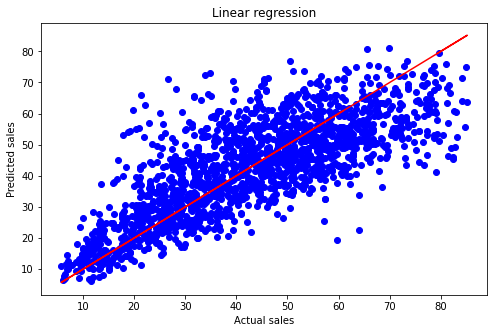

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(x=y_test,y=pred_test,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual sales",fontsize=10)
plt.ylabel("Predicted sales",fontsize=10)
plt.title("Linear regression")
plt.show

#### The best fit line is covering all of the point == model is trained and is a good fit.

## Hyper parameter tuning of best model above (Gradient Boosting Regression)

In [113]:
from sklearn.model_selection import GridSearchCV

#creating parameters to pass in Grid serach
para={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      'n_estimators':[10,12,21],
      'max_depth':[4,5,6,7],
      'criterion':['squared_error', 'mse','friedman_mse'],
       'max_features':['sqrt', 'log2', 'auto']}

In [114]:
GCV=GridSearchCV(GradientBoostingRegressor(),para,cv=5)
GCV.fit(x_train,y_train) 
GCV.best_params_   

{'criterion': 'friedman_mse',
 'loss': 'huber',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 21}

In [115]:
GBR=GradientBoostingRegressor(criterion='friedman_mse', max_depth= 5, max_features= 'auto', n_estimators= 21, loss='huber')

In [117]:
fit=GBR.fit(x_train,y_train)   #fiting the data in the model
GBR_pred = GBR.predict(x_test)

In [118]:
final_r2=(r2_score(y_test,GBR_pred)*100)              #checking final R2 Score
print("Best R2 Score for GCV best estimator", GBR, "is",final_r2)

Best R2 Score for GCV best estimator GradientBoostingRegressor(loss='huber', max_depth=5, max_features='auto',
                          n_estimators=21) is 64.89874469291308


## Saving the model

In [126]:
import pickle
filename="Bid_data_sales.pkl"
pickle.dump(GBR,open(filename,'wb'))

## Conclusion:

In [131]:
GBR=pickle.load(open(filename,'rb'))

GBR.predict(x_test)

array([56.11967744, 53.78483439, 37.40469318, ..., 49.76138121,
       43.17754677, 56.11967744])

In [135]:
Conc=pd.DataFrame([GBR.predict(x_test)[:],(gb.predict(x_test))[:]],index=['Predicted','Orginial'])
Conc

,0,1,2,3,4,5,6,7,8,9,...,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667
Predicted,56.119677,53.784834,37.404693,43.951617,59.754924,31.927431,27.151775,41.456211,59.131297,45.391959,...,60.418132,25.295761,25.901606,37.446338,58.189380,37.433644,14.297077,49.761381,43.177547,56.119677
Orginial,57.470128,54.905142,35.821365,43.239065,61.215411,32.767931,25.295118,41.712997,61.411390,45.250224,...,62.035409,24.060805,24.711043,34.531952,59.756282,36.936154,12.962597,49.285428,41.985479,57.545480


# END